### Импорт библиотек

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.simplefilter('ignore')

### Считываем датасет и сразу делаем копию, с которой будем работать

In [2]:
data = pd.read_csv("cowid-covid-data.csv")
df = data.copy(deep=True)

In [3]:
data.new_tests.isna().sum()

78534

In [4]:
with pd.option_context('display.max_columns', None):
    display(df.head(3))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
rows, columns = df.shape
print(f'Кол-во строк: {rows}', f'Кол-во признаков: {columns}')

Кол-во строк: 134670 Кол-во признаков: 67


### Описание столбцов

iso_code - код страны

continent - континент

location - страна

total_cases - всего случаев

new_cases - новых случаев

new_cases_smoothed - новые дела сглажены

total_deaths - всего смертей

new_deaths - новых смертей

new_deaths_smoothed - новые смерти сглажены

total_cases_per_million - всего случаев на миллион

new_cases_per_million - новых случаев на миллион

new_cases_smoothed_per_million - число новых дел, сглаженных на миллион

total_deaths_per_million - всего смертей на миллион
new_deaths_per_million - новый смертей на миллион

new_deaths_smoothed_per_million - число смертей, сглаженных на миллион

reproduction_rate - скорость размножения

icu_patients - пациенты отделения интенсивной терапии

icu_patients_per_million - пациенты отделения интенсивной терапии на миллион

hosp_patients - госпитализированных пациентов

hosp_patients_per_million - госпитализированных пациентов на миллион

weekly_icu_admissions - еженедельные госпитализации в отделение интенсивной терапии

weekly_icu_admissions_per_million - еженедельные госпитализации в отделение интенсивной терапии на миллион

weekly_hosp_admissions - еженедельные госпитализации

weekly_hosp_admissions_per_million - еженедельные госпитализации на миллион

new_tests - новых тестов

total_tests - всего тестов

total_tests_per_thousand - всего тестов на тысячу

new_tests_per_thousand - новых тестов на тысячу

new_tests_smoothed - новые тесты сглажены

new_tests_smoothed_per_thousand - новые тесты сглажены на тысячу

positive_rate - положительный показатель

tests_per_case - тестов на случай

tests_units - единицы измерения тестов

total_vaccinations - всего прививок

people_vaccinated - людей вакцинировано

people_fully_vaccinated - полностью вакцинированных людей

total_boosters - всего помощников

new_vaccinations - новые прививки

new_vaccinations_smoothed - новые прививки сглажены

total_vaccinations_per_hundred - новые прививки на сотню

people_vaccinated_per_hundred - людей вакцинировано на сотню

people_fully_vaccinated_per_hundred - полностью вакцинированных людей на сотню

total_boosters_per_hundred - общее количество ускорителей на сотню

new_vaccinations_smoothed_per_million - число новых вакцинаций уменьшилось на миллион

new_people_vaccinated_smoothed - новые люди, вакцинированные, сглаженные

new_people_vaccinated_smoothed_per_hundred - новые люди, вакцинированные, сглаженные на сотню

stringency_index - индекс строгости

population - население

population_density - плотность населения

median_age - медианный возраст

aged_65_older - старше 65

aged_70_older - старше 70

gdp_per_capita - ввп на душу населения

extreme_poverty - крайняя нищета

cardiovasc_death_rate - смертность от сердечно-сосудистых заболеваний

diabetes_prevalence - распространенность диабета
female_smokers - курящих женщин

male_smokers - курящих мужчин

handwashing_facilities - средства для мытья рук

hospital_beds_per_thousand - больничных коек на тысячу

life_expectancy - ожидаемая продолжительность жизни

human_development_index - индекс человеческого развития

excess_mortality_cumulative_absolute - избыточная смертность совокупный абсолютный

excess_mortality_cumulative - совокупная избыточная смертность

excess_mortality - избыточная смертность

excess_mortality_cumulative_per_million - совокупный показатель избыточной смертности на миллион

### Типы данных столбцов

In [6]:
with pd.option_context('display.max_rows', None):
    display(df.dtypes)

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

### Просмотр информации для категориальных признаков

In [7]:
df.describe(include='O')

,iso_code,continent,location,date,tests_units
count,134670,126079,134670,134670,70467
unique,237,6,237,690,4
top,PER,Africa,Peru,2021-06-25,tests performed
freq,690,33295,690,234,44484


### Просмотр информации для количественных признаков

In [8]:
with pd.option_context('display.max_rows', None):
    display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
total_cases,127273.0,2.088706e+06,1.189992e+07,1.000000,2.457000e+03,2.824200e+04,2.712610e+05,2.571687e+08
new_cases,127271.0,8.413133e+03,4.380109e+04,-74347.000000,3.000000e+00,1.050000e+02,1.088000e+03,9.082900e+05
new_cases_smoothed,126228.0,8.423270e+03,4.323639e+04,-6223.000000,1.042900e+01,1.310000e+02,1.142857e+03,8.272197e+05
total_deaths,116084.0,5.132513e+04,2.632162e+05,1.000000,8.200000e+01,7.650000e+02,6.614000e+03,5.146467e+06
new_deaths,116280.0,1.835793e+02,8.693032e+02,-1918.000000,0.000000e+00,2.000000e+00,2.200000e+01,1.800700e+04
new_deaths_smoothed,126228.0,1.683480e+02,8.158135e+02,-232.143000,1.430000e-01,2.000000e+00,1.871400e+01,1.470329e+04
total_cases_per_million,126620.0,2.029298e+04,3.363063e+04,0.001000,4.244485e+02,3.290173e+03,2.568939e+04,2.459418e+05
new_cases_per_million,126618.0,8.811823e+01,2.038914e+02,-3125.829000,3.280000e-01,1.135000e+01,8.427575e+01,8.620690e+03
new_cases_smoothed_per_million,125580.0,8.795993e+01,1.729531e+02,-272.971000,1.654000e+00,1.599350e+01,9.383600e+01,3.385473e+03
total_deaths_per_million,115444.0,4.108551e+02,6.721290e+02,0.000000,1.239800e+01,8.306550e+01,5.425335e+02,6.020279e+03


### Отбор основных признаков, по которым возможно корректное обучение моделей

### Обоснование исключения признаков:

In [9]:
# 'location' описывает 'iso_code', и обратно, длина уникальных значений идентична
len(df.iso_code.unique()) == len(df.location.unique())
df.drop('iso_code', axis=1, inplace=True)

In [10]:
# Признаки с количеством пропусков более 50%
# Если их не исключить, данные будут сильно отклонены от изначальных при заполнении пустых значений
for i in df.columns:
    if df[i].isna().sum() > df.shape[0] / 2:
        df.drop(columns=i, axis=1, inplace=True)

In [11]:
df.shape

(134670, 34)

### Посмотрим на отфильтрованные признаки и их типы данных

In [12]:
with pd.option_context('display.max_rows', None):
    display(df.columns, df.dtypes)

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
reproduction_rate                  float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

### Посмотрим количество пустых значений для каждого признака 

In [13]:
df.isna().sum()

continent                           8591
location                               0
date                                   0
total_cases                         7397
new_cases                           7399
new_cases_smoothed                  8442
total_deaths                       18586
new_deaths                         18390
new_deaths_smoothed                 8442
total_cases_per_million             8050
new_cases_per_million               8052
new_cases_smoothed_per_million      9090
total_deaths_per_million           19226
new_deaths_per_million             19030
new_deaths_smoothed_per_million     9090
reproduction_rate                  29689
new_tests_smoothed                 66236
new_tests_smoothed_per_thousand    66236
tests_units                        64203
stringency_index                   25059
population                           963
population_density                 12798
median_age                         18541
aged_65_older                      19825
aged_70_older   

#### Категориальные признаки

In [14]:
# continent
df[df.continent.isna()]['location'].value_counts()

Asia                   669
High income            669
Lower middle income    669
North America          669
Upper middle income    669
World                  669
Europe                 668
European Union         668
Oceania                666
International          653
Africa                 647
South America          638
Low income             637
Name: location, dtype: int64

In [15]:
### Заменим пустые значения на значения 'other country' так как нам будут нужны эти данные для общей статистики
df.continent = df.continent.fillna('other country')

In [16]:
# tests_units
df.tests_units.value_counts()

tests performed    44484
people tested      13160
samples tested     11548
units unclear       1275
Name: tests_units, dtype: int64

In [17]:
# значение units_unclear означает, что измерение неясно, пустые значения заменим на него 
df.tests_units = df.tests_units.fillna('units unclear')

In [18]:
df.tests_units.value_counts()

units unclear      65478
tests performed    44484
people tested      13160
samples tested     11548
Name: tests_units, dtype: int64

#### Проверка, содержит ли признак location неподходящие значения, например группы стран

In [19]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

#### Есть неподходящие значения, такие как: 
>Upper middle income - Доход выше среднего

>Lower middle income - Доход ниже среднего 

>Low income - Низкий доход

>International - международный

>High income - Высокий доход


#### Выведем их количество

In [20]:
df[df.location == 'Upper middle income'].shape[0]

669

In [21]:
df[df.location == 'Lower middle income'].shape[0]

669

In [22]:
df[df.location == 'Low income'].shape[0]

637

In [23]:
df[df.location == 'International'].shape[0]

653

In [24]:
df[df.location == 'High income'].shape[0] 

669

#### Эти значения будут путать модель, так же их не так много, поэтому от них можно избавиться

In [25]:
df.drop(df[df.location == 'Upper middle income'].index, axis=0, inplace=True)
df.drop(df[df.location == 'Lower middle income'].index, axis=0, inplace=True)
df.drop(df[df.location == 'Low income'].index, axis=0, inplace=True)
df.drop(df[df.location == 'International'].index, axis=0, inplace=True)
df.drop(df[df.location == 'High income'].index, axis=0, inplace=True)

### Количественные признаки

In [26]:
# population
df[df.population.isna()]['location'].value_counts() 

Northern Cyprus    310
Name: location, dtype: int64

In [27]:
df[df.continent == 'Asia'][['location', 'population']].value_counts()

location              population  
Thailand              6.995084e+07    687
Taiwan                2.385501e+07    675
South Korea           5.130518e+07    670
China                 1.444216e+09    669
Japan                 1.260508e+08    669
Vietnam               9.816883e+07    668
Singapore             5.453600e+06    668
Hong Kong             7.552800e+06    668
Malaysia              3.277620e+07    667
Nepal                 2.967492e+07    666
Cambodia              1.694645e+07    664
Sri Lanka             2.149731e+07    664
United Arab Emirates  9.991083e+06    662
India                 1.393409e+09    661
Philippines           1.110469e+08    661
Iran                  8.502876e+07    641
Israel                9.291000e+06    640
Lebanon               6.769151e+06    639
Oman                  5.223376e+06    636
Afghanistan           3.983543e+07    636
Iraq                  4.117935e+07    636
Kuwait                4.328553e+06    636
Bahrain               1.748295e+06    636

#### Признак population отсутствует только у страны 'Northern Cyprus', которая встречается 310 раз

##### Что-то делаем с Northern Cyprus

In [28]:
# stringency_index
df.stringency_index.describe()

count    109611.000000
mean         56.186155
std          20.660210
min           0.000000
25%          42.130000
50%          56.940000
75%          72.220000
max         100.000000
Name: stringency_index, dtype: float64

In [29]:
df.stringency_index.fillna(0, inplace=True)

In [30]:
df.isna().sum()

continent                              0
location                               0
date                                   0
total_cases                         7395
new_cases                           7399
new_cases_smoothed                  8413
total_deaths                       18530
new_deaths                         18377
new_deaths_smoothed                 8413
total_cases_per_million             7395
new_cases_per_million               7399
new_cases_smoothed_per_million      8413
total_deaths_per_million           18530
new_deaths_per_million             18377
new_deaths_smoothed_per_million     8413
reproduction_rate                  26392
new_tests_smoothed                 62939
new_tests_smoothed_per_thousand    62939
tests_units                            0
stringency_index                       0
population                           310
population_density                  9501
median_age                         15244
aged_65_older                      16528
aged_70_older   

In [31]:
df.dtypes

continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
reproduction_rate                  float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [32]:
# Нет нужно для обработки информации, можно удалить
df[['aged_65_older', 'aged_70_older']].describe().T
df.drop('aged_70_older', axis=1, inplace=True)

In [33]:
df[['female_smokers', 'male_smokers']].describe().T
df.female_smokers.interpolate(method='polynomial', order=2, inplace=True)
df.male_smokers.interpolate(method='polynomial', order=2, inplace=True)

In [34]:
df[['female_smokers', 'male_smokers']].isna().sum()

female_smokers    1283
male_smokers      1283
dtype: int64

In [35]:
# Не столь важно, сколько человек заболело на 1 миллион или тысячу жителей определенной страны, 
# гораздо важнее уровень развития этой страны
df.drop(
    ['total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million',
    'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests_smoothed_per_thousand'], axis=1, inplace=True)

In [36]:
# Пропуски признаков с количеством смертей возможно заполнить так же через метод polynomial
df.total_cases.interpolate(method='polynomial', order=2, inplace=True)
df.new_cases.interpolate(method='polynomial', order=2, inplace=True)
df.new_cases_smoothed.interpolate(method='polynomial', order=2, inplace=True)
df.total_deaths.interpolate(method='polynomial', order=2, inplace=True)
df.new_deaths.interpolate(method='polynomial', order=2, inplace=True)

df.new_deaths_smoothed.interpolate(method='polynomial', order=2, inplace=True)
df.new_deaths_smoothed.interpolate(method='polynomial', order=2, inplace=True)
df.new_tests_smoothed.interpolate(method='polynomial', order=2, inplace=True)

#df.iloc[:, 3:15].interpolate()...

In [37]:
df.reproduction_rate.describe()

count    104981.000000
mean          0.998739
std           0.341137
min          -0.030000
25%           0.830000
50%           1.010000
75%           1.170000
max           6.000000
Name: reproduction_rate, dtype: float64

In [38]:
# Пропуски в признаке reprodaction_rate так же допустимо заполнить с помощью метода polynomail
# так как reprodaction_rate(скорость размножения болезни) колеблится

# Пример
df[df['location'] == 'Japan']['reproduction_rate'].unique()

array([ nan, 1.24, 1.15, 1.08, 1.04, 1.05, 1.01, 1.18, 1.34, 1.43, 1.57,
       1.64, 1.75, 1.68, 1.6 , 1.55, 1.54, 1.31, 1.11, 1.07, 0.99, 1.03,
       1.1 , 1.14, 1.32, 1.5 , 1.63, 1.77, 1.86, 1.97, 2.12, 2.1 , 2.03,
       2.07, 2.02, 1.95, 1.89, 1.81, 1.72, 1.7 , 1.74, 1.73, 1.66, 1.56,
       1.23, 1.17, 1.12, 0.96, 0.89, 0.84, 0.81, 0.76, 0.72, 0.71, 0.67,
       0.66, 0.7 , 0.56, 0.48, 0.42, 0.41, 0.44, 0.46, 0.49, 0.47, 0.45,
       0.5 , 0.61, 0.73, 0.83, 0.98, 0.94, 0.9 , 0.88, 0.93, 0.92, 1.06,
       1.22, 1.33, 1.19, 1.13, 1.09, 1.28, 1.39, 1.37, 1.4 , 1.45, 1.67,
       1.53, 1.61, 1.65, 1.58, 1.52, 1.51, 1.46, 1.47, 1.38, 1.44, 1.27,
       1.21, 1.16, 0.87, 0.91, 0.85, 0.82, 0.8 , 0.74, 0.78, 1.  , 1.02,
       1.41, 1.35, 1.36, 0.97, 0.86, 0.75, 0.69, 0.65, 0.64, 0.63, 0.79,
       0.95, 1.25, 1.29, 1.26, 1.3 , 1.2 , 0.77, 1.78, 1.69, 1.48, 1.42,
       0.68, 0.59, 0.58, 0.53, 0.51, 0.43, 0.52, 0.54, 0.62])

In [39]:
df.reproduction_rate.interpolate(method='polynomial', order=2, inplace=True)

In [40]:
df.isna().sum()

continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                5
total_deaths                     28
new_deaths                       28
new_deaths_smoothed               5
reproduction_rate                44
new_tests_smoothed             1292
tests_units                       0
stringency_index                  0
population                      310
population_density             9501
median_age                    15244
aged_65_older                 16528
gdp_per_capita                14493
extreme_poverty               53227
cardiovasc_death_rate         15021
diabetes_prevalence           11180
female_smokers                 1283
male_smokers                   1283
hospital_beds_per_thousand    25635
life_expectancy                6179
human_development_index       14901
dtype: int64

In [41]:
df.extreme_poverty.describe()

count    78146.000000
mean        13.513193
std         19.994084
min          0.100000
25%          0.600000
50%          2.200000
75%         21.200000
max         77.600000
Name: extreme_poverty, dtype: float64

In [42]:
# Пропуски признака extreme_poverty возможно заполнить с помощью метода fillna(method='ffill')
df[df.location == 'China']['extreme_poverty']
df[df.extreme_poverty == 77.6]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,...,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
73215,Africa,Madagascar,2020-03-20,3.0,3.0,-0.466042,64.015849,64.389582,0.002463,0.936009,...,2.929,1416.44,77.6,405.994,3.94,17.781460,25.754297,0.2,67.04,0.528
73216,Africa,Madagascar,2020-03-21,3.0,0.0,0.154415,62.069646,63.601670,0.001625,0.926326,...,2.929,1416.44,77.6,405.994,3.94,17.758433,25.752483,0.2,67.04,0.528
73217,Africa,Madagascar,2020-03-22,3.0,0.0,0.782648,60.153610,62.803056,0.000960,0.916630,...,2.929,1416.44,77.6,405.994,3.94,17.735321,25.750662,0.2,67.04,0.528
73218,Africa,Madagascar,2020-03-23,12.0,9.0,1.418656,58.267739,61.993740,0.000467,0.906921,...,2.929,1416.44,77.6,405.994,3.94,17.712124,25.748834,0.2,67.04,0.528
73219,Africa,Madagascar,2020-03-24,17.0,5.0,2.062440,56.412034,61.173722,0.000147,0.897198,...,2.929,1416.44,77.6,405.994,3.94,17.688842,25.747000,0.2,67.04,0.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73821,Africa,Madagascar,2021-11-16,43672.0,0.0,5.714000,964.000000,0.000000,0.000000,0.157127,...,2.929,1416.44,77.6,405.994,3.94,4.401209,24.700095,0.2,67.04,0.528
73822,Africa,Madagascar,2021-11-17,43672.0,0.0,0.000000,964.000000,0.000000,0.000000,0.168043,...,2.929,1416.44,77.6,405.994,3.94,4.400797,24.700063,0.2,67.04,0.528
73823,Africa,Madagascar,2021-11-18,43672.0,0.0,0.000000,964.000000,0.000000,0.000000,0.180311,...,2.929,1416.44,77.6,405.994,3.94,4.400471,24.700037,0.2,67.04,0.528
73824,Africa,Madagascar,2021-11-19,43672.0,0.0,0.000000,964.000000,0.000000,0.000000,0.193930,...,2.929,1416.44,77.6,405.994,3.94,4.400229,24.700018,0.2,67.04,0.528


In [43]:
df.extreme_poverty.fillna(method='ffill', inplace=True)
df.extreme_poverty.isna().sum()

1283

In [44]:
# Не имеем важного значения для построения модели, потому как..
df.new_tests_smoothed.describe()
df.drop('new_tests_smoothed', axis=1, inplace=True)

In [45]:
# median_age потому что средний возраст
df.median_age.fillna(df.median_age.median(), inplace=True)

In [46]:
# Ввп не влияет на статистику, это признак характеризует признак stringency_index
df.drop('gdp_per_capita', axis=1, inplace=True)

In [47]:
df.isna().sum()

continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                5
total_deaths                     28
new_deaths                       28
new_deaths_smoothed               5
reproduction_rate                44
tests_units                       0
stringency_index                  0
population                      310
population_density             9501
median_age                        0
aged_65_older                 16528
extreme_poverty                1283
cardiovasc_death_rate         15021
diabetes_prevalence           11180
female_smokers                 1283
male_smokers                   1283
hospital_beds_per_thousand    25635
life_expectancy                6179
human_development_index       14901
dtype: int64

In [48]:
df.cardiovasc_death_rate.interpolate(method='polynomial', order=2, inplace=True)

In [49]:
df.hospital_beds_per_thousand.unique()
df.hospital_beds_per_thousand.interpolate(method='polynomial', order=2, inplace=True)

In [50]:
df.diabetes_prevalence.interpolate(method='polynomial', order=2, inplace=True)

In [51]:
df.life_expectancy.interpolate(method='polynomial', order=2, inplace=True)

In [52]:
df.human_development_index.interpolate(method='polynomial', order=2, inplace=True)

In [53]:
df.aged_65_older.interpolate(method='polynomial', order=2, inplace=True) 

In [54]:
df.population_density.interpolate(method='polynomial', order=2, inplace=True)

In [55]:
df.isna().sum()

continent                        0
location                         0
date                             0
total_cases                      0
new_cases                        0
new_cases_smoothed               5
total_deaths                    28
new_deaths                      28
new_deaths_smoothed              5
reproduction_rate               44
tests_units                      0
stringency_index                 0
population                     310
population_density               0
median_age                       0
aged_65_older                    0
extreme_poverty               1283
cardiovasc_death_rate            0
diabetes_prevalence              0
female_smokers                1283
male_smokers                  1283
hospital_beds_per_thousand       0
life_expectancy                  0
human_development_index          0
dtype: int64

In [56]:
df.dropna(inplace=True)
df.isna().sum()

continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
new_cases_smoothed            0
total_deaths                  0
new_deaths                    0
new_deaths_smoothed           0
reproduction_rate             0
tests_units                   0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
dtype: int64

In [57]:
df.shape[1]

24

In [58]:
df.shape[0]

129770

In [59]:
df.drop(df[df['continent'] == 'other country'].index, axis=0, inplace=True)

In [60]:
df.shape[0]

125123

In [61]:
df_clusters = df.drop(['location', 'date', 'continent'], axis=1)
df_clusters.shape[1]

21

In [62]:
from sklearn.preprocessing import LabelEncoder
units_le = LabelEncoder()

df_clusters.tests_units = units_le.fit_transform(df_clusters.tests_units)

In [63]:
with pd.option_context('display.max_columns', None):
    display(df_clusters.head())

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
1283,8.446539e+06,1296.883841,3284.054244,218851.897047,42.238836,56.177885,1.677292,2,8.33,2872934.0,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1284,8.153366e+06,78.914713,3237.414021,213020.917972,-7.692035,18.761051,1.661431,2,8.33,2872934.0,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1285,7.700648e+06,-841.907382,3153.508332,203994.062775,-46.792613,-12.393503,1.645509,2,8.33,2872934.0,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1286,7.088384e+06,-1465.582447,3032.337177,191771.331457,-75.062898,-37.285777,1.629525,2,8.33,2872934.0,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1287,6.316575e+06,-1792.110479,2873.900555,176352.724016,-92.502891,-55.915771,1.613480,2,8.33,2872934.0,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795


### Кластеризация 

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
# Не количественные признаки или они в процентном соотношении 
scaler = StandardScaler() # 
x_scale = scaler.fit_transform(df_clusters)
df_scale = pd.DataFrame(x_scale, columns=df_clusters.columns)
with pd.option_context('display.max_columns', None):
    display(df_scale)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2.373353,0.038191,-0.007843,2.614487,0.048893,0.066797,1.136236,-0.149026,-1.511579,-0.249794,-0.157033,0.859002,0.742291,-0.617826,0.376014,0.453288,-0.399681,1.482857,-0.060344,0.700030,0.467406
1,2.283880,0.024929,-0.009597,2.539288,0.027707,-0.120411,1.108054,-0.149026,-1.511579,-0.249794,-0.157033,0.859002,0.742291,-0.617826,0.376014,0.453288,-0.399681,1.482857,-0.060344,0.700030,0.467406
2,2.145714,0.014902,-0.012753,2.422873,0.011115,-0.276286,1.079763,-0.149026,-1.511579,-0.249794,-0.157033,0.859002,0.742291,-0.617826,0.376014,0.453288,-0.399681,1.482857,-0.060344,0.700030,0.467406
3,1.958857,0.008111,-0.017309,2.265243,-0.000880,-0.400830,1.051363,-0.149026,-1.511579,-0.249794,-0.157033,0.859002,0.742291,-0.617826,0.376014,0.453288,-0.399681,1.482857,-0.060344,0.700030,0.467406
4,1.723308,0.004556,-0.023267,2.066396,-0.008281,-0.494042,1.022854,-0.149026,-1.511579,-0.249794,-0.157033,0.859002,0.742291,-0.617826,0.376014,0.453288,-0.399681,1.482857,-0.060344,0.700030,0.467406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125118,-0.163813,0.024680,-0.130040,-0.147517,0.030970,-0.207128,-0.422541,-0.149026,-1.820963,-0.168677,-0.190911,-1.245515,-0.957502,0.390992,0.407178,-1.431396,-0.933398,-0.134368,-0.558648,-1.569603,-1.051881
125119,-0.163807,0.024277,-0.130212,-0.147517,0.030970,-0.209275,-0.404773,-0.149026,-1.820963,-0.168677,-0.190911,-1.245515,-0.957502,0.390992,0.407178,-1.431396,-0.933398,-0.134368,-0.558648,-1.569603,-1.051881
125120,-0.163802,0.024266,-0.130277,-0.147452,0.033092,-0.206418,-0.387005,-0.149026,-1.820963,-0.168677,-0.190911,-1.245515,-0.957502,0.390992,0.407178,-1.431396,-0.933398,-0.134368,-0.558648,-1.569603,-1.051881
125121,-0.163790,0.024473,-0.130293,-0.147439,0.031395,-0.208559,-0.369237,-0.149026,-1.820963,-0.168677,-0.190911,-1.245515,-0.957502,0.390992,0.407178,-1.431396,-0.933398,-0.134368,-0.558648,-1.569603,-1.051881


### Попробуем метод KMeans

In [70]:
from sklearn.cluster import KMeans

In [71]:
model = KMeans(n_clusters=3)

In [72]:
y_pred = model.fit_predict(df_scale)
pd.DataFrame(y_pred)[0].value_counts()

0    63800
1    61051
2      272
Name: 0, dtype: int64

In [77]:
df['y_pred'] = y_pred
df_scale['location'] = df['location']
df_scale['date'] = df['date']
df_scale['continent'] = df['continent']
df_scale['y_pred'] = y_pred

In [80]:
df_scale[df_scale['location'] == 'Russia']

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,tests_units,stringency_index,population,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,location,date,continent,y_pred
99802,-0.203716,0.024113,-0.131287,-0.206982,0.03097,-0.214278,0.465862,0.882827,-0.445261,-0.214820,...,-1.294494,-0.234715,0.701856,0.064372,-2.471875,-1.859003,Russia,2020-01-31,Europe,0
99803,-0.203716,0.024070,-0.131287,-0.206982,0.03097,-0.214278,0.501398,0.882827,-0.445261,-0.214820,...,-1.294494,-0.234715,0.701856,0.062985,-2.471875,-1.859003,Russia,2020-02-01,Europe,0
99804,-0.203714,0.024135,-0.131260,-0.206982,0.03097,-0.214278,0.572470,0.882827,-0.445261,-0.214820,...,-1.294494,-0.234715,0.701856,0.061592,-2.471875,-1.859003,Russia,2020-02-02,Europe,0
99805,-0.203714,0.024092,-0.131254,-0.206982,0.03097,-0.214278,0.572470,0.882827,-0.445261,-0.214820,...,-1.294494,-0.234715,0.701856,0.060194,-2.471875,-1.859003,Russia,2020-02-03,Europe,0
99806,-0.203714,0.024070,-0.131260,-0.206982,0.03097,-0.214278,0.590238,0.882827,-0.445261,-0.214820,...,-1.294494,-0.234715,0.701856,0.058790,-2.471875,-1.859003,Russia,2020-02-04,Europe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100457,-0.186708,0.024124,-0.131169,-0.207576,0.03097,-0.214278,0.039428,-1.180880,-0.135876,-0.232662,...,0.660923,-0.584056,-0.323701,-0.265528,1.371086,1.437307,Russia,2021-11-16,Europe,1
100458,-0.186705,0.024200,-0.131120,-0.207576,0.03097,-0.214278,0.270413,-1.180880,-0.135876,-0.232662,...,0.660923,-0.584056,-0.323701,-0.265528,1.371086,1.437307,Russia,2021-11-17,Europe,1
100459,-0.186703,0.024124,-0.131120,-0.207576,0.03097,-0.214278,0.288181,-1.180880,-0.135876,-0.232662,...,0.660923,-0.584056,-0.323701,-0.265528,1.371086,1.437307,Russia,2021-11-18,Europe,1
100460,-0.186698,0.024266,-0.131056,-0.207576,0.03097,-0.214278,0.341485,-1.180880,-0.135876,-0.232662,...,0.660923,-0.584056,-0.323701,-0.265528,1.371086,1.437307,Russia,2021-11-19,Europe,1


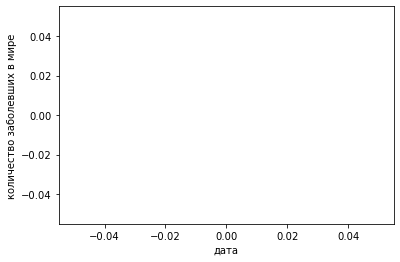

In [78]:
plt.scatter(x=df_scale[df_scale.location == 'Russia']['date'], y=df_scale[df_scale.location == 'Russia']['total_cases'], c=df_scale[df_scale['location'] == 'Russia']['y_pred'].map({0: 'red', 1: 'yellow', 2:'green'}))
plt.xlabel('дата')
plt.ylabel('количество заболевших в мире')
plt.show()

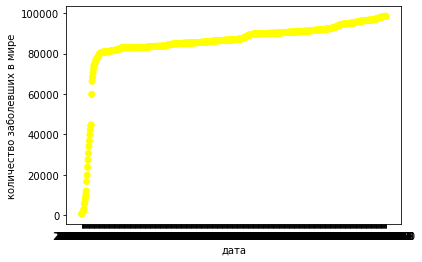

In [83]:
# Ускорение процесса вывода графиков
plt.scatter(x=df[df.location == 'China']['date'], y=df[df.location == 'China']['total_cases'], c=df[df['location'] == 'China']['y_pred'].map({0: 'red', 1: 'yellow', 2:'green'}))
plt.xlabel('дата')
plt.ylabel('количество заболевших в мире')
plt.show()